<a href="https://colab.research.google.com/github/mertylcndg/Introduction_to_Machine_Learning/blob/main/SVM_and_GaussianNB_With_Cancer_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd 
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
data = pd.read_csv("/content/drive/MyDrive/Data/Breast_Cancer_Wisconsin_(Diagnostic)_Data_Set.csv")

In [3]:
data.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
data.drop(["id","Unnamed: 32"],axis=1,inplace=True)

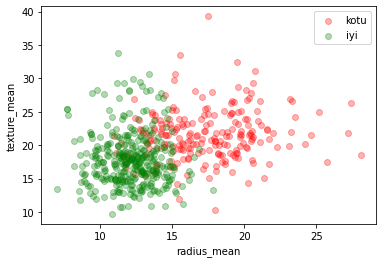

In [5]:
M = data[data.diagnosis == "M"]
B = data[data.diagnosis == "B"]
# scatter plot
plt.scatter(M.radius_mean,M.texture_mean,color="red",label="kotu",alpha= 0.3)
plt.scatter(B.radius_mean,B.texture_mean,color="green",label="iyi",alpha= 0.3)
plt.xlabel("radius_mean")
plt.ylabel("texture_mean")
plt.legend()
plt.show()

In [6]:
data.diagnosis = [1 if each == "M" else 0 for each in data.diagnosis]
y = data.diagnosis.values
x_data = data.drop(["diagnosis"],axis=1)

In [7]:
# normalization 
x = (x_data - np.min(x_data))/(np.max(x_data)-np.min(x_data))

In [8]:
# train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3,random_state=1)

In [9]:
x_train.shape

(398, 30)

In [10]:
from sklearn.svm import SVC
# with default c value
svc = SVC(random_state = 42)
svc.fit(x_train,y_train)

SVC(random_state=42)

In [11]:
# %% test
print("print accuracy of svm algo: {}".format(svc.score(x_test,y_test)))

print accuracy of svm algo: 0.9649122807017544


In [12]:
y_pred = svc.predict(x_test)

In [13]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

Text(15.0, 0.5, 'y test')

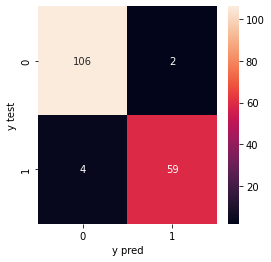

In [14]:
plt.figure(figsize=(4,4))
sns.heatmap(cm,annot=True,fmt = ".0f" )
plt.xlabel("y pred")
plt.ylabel("y test")

In [33]:
list_test_accure = []
list_train_accure = []
for i in range(1,100):
  svm = SVC(C=i,random_state=1)
  svm.fit(x_train,y_train)
  #print("print accuracy of svm algo: {}".format(svm.score(x_test,y_test)))
  list_test_accure.append(svm.score(x_test,y_test))
  list_train_accure.append(svm.score(x_train,y_train))


In [34]:
max(list_test_accure)

0.9649122807017544

In [35]:
max(list_train_accure)

1.0

In [36]:
index_test = list_test_accure.index(max(list_test_accure))
print(index_test)

0


In [37]:
index_train = list_train_accure.index(max(list_train_accure))
print(index_train)

44


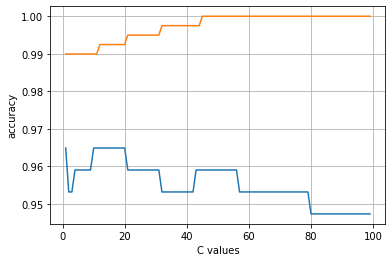

In [44]:
plt.plot(range(1,100),list_test_accure)
plt.plot(range(1,100),list_train_accure)
plt.xlabel("C values")
plt.ylabel("accuracy")
plt.grid()
plt.show()

In [45]:
svm_last = SVC(C=18,random_state=1)
svm_last.fit(x_train,y_train)

SVC(C=18, random_state=1)

In [72]:
print("print accuracy of svm algo: {}".format(svm_last.score(x_test,y_test)))

print accuracy of svm algo: 0.9649122807017544


In [47]:
svm_last.score(x_train,y_train)

0.992462311557789

Text(15.0, 0.5, 'y test')

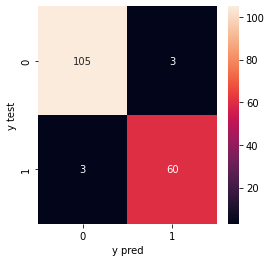

In [56]:
y_pred_svm = svm_last.predict(x_test)
cm_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(4,4))
sns.heatmap(cm_svm,annot=True,fmt = ".0f" )
plt.xlabel("y pred")
plt.ylabel("y test")

In [57]:
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()
GNB.fit(x_train, y_train)

GaussianNB()

In [76]:
print("print accuracy of svm algo: {}".format(GNB.score(x_test,y_test)))

print accuracy of svm algo: 0.935672514619883


Text(15.0, 0.5, 'y test')

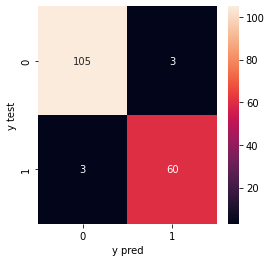

In [59]:
y_pred_gnb = GNB.predict(x_test)
cm_gnb = confusion_matrix(y_test, y_pred_gnb)
plt.figure(figsize=(4,4))
sns.heatmap(cm_svm,annot=True,fmt = ".0f" )
plt.xlabel("y pred")
plt.ylabel("y test")

Text(0.5, 1.0, 'SVM and GaussianNB Confusion Matrix')

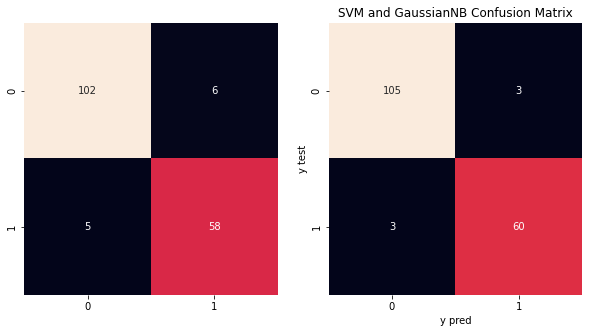

In [77]:
fig, axs = plt.subplots(ncols=2,figsize=(10,5))
sns.heatmap(cm_gnb,annot=True,fmt = ".0f" ,cbar=False,ax=axs[0])
sns.heatmap(cm_svm,annot=True,fmt = ".0f" ,cbar=False,ax=axs[1])
plt.xlabel("y pred")
plt.ylabel("y test")
plt.title("SVM and GaussianNB Confusion Matrix")